# Topic: Predicting the Housing Price in Boston
Description: Using Multipule Linear Regression model to predict the Housing Price in Boston based on the several features in the dataset. Please refer to the dataset: price_data.csv.

## Step 1: Import the needed tools and datasets
Firstly, import all tools and dataset which are needed, including the the tools for manage dataframe, array, the model constructing tools from scikit-learn, and the MAE for showing the accuacy rate. As the data showed, there are 13 features, which represents variable X. And "MEDV" represents Target Variable.

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
#load data
data = pd.read_csv('hw3_data.csv')
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Step2: Review Data
By reviewing the corelation between Target Variable and each feature,  we can select the important features to construct multiple regression model. In this case, we use the function "heat map" and "pair plot" to show their corelation.

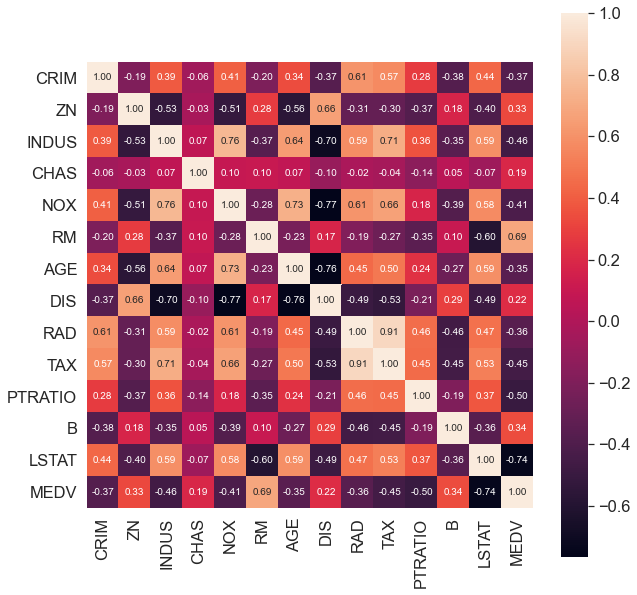

In [4]:
#check corelation of variables
plt.figure(figsize=(10, 10))
cm = np.corrcoef(data.values.T)
sns.set (font_scale = 1.5)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 10},
                yticklabels = list(data.columns),
                xticklabels = list(data.columns))
plt.show()

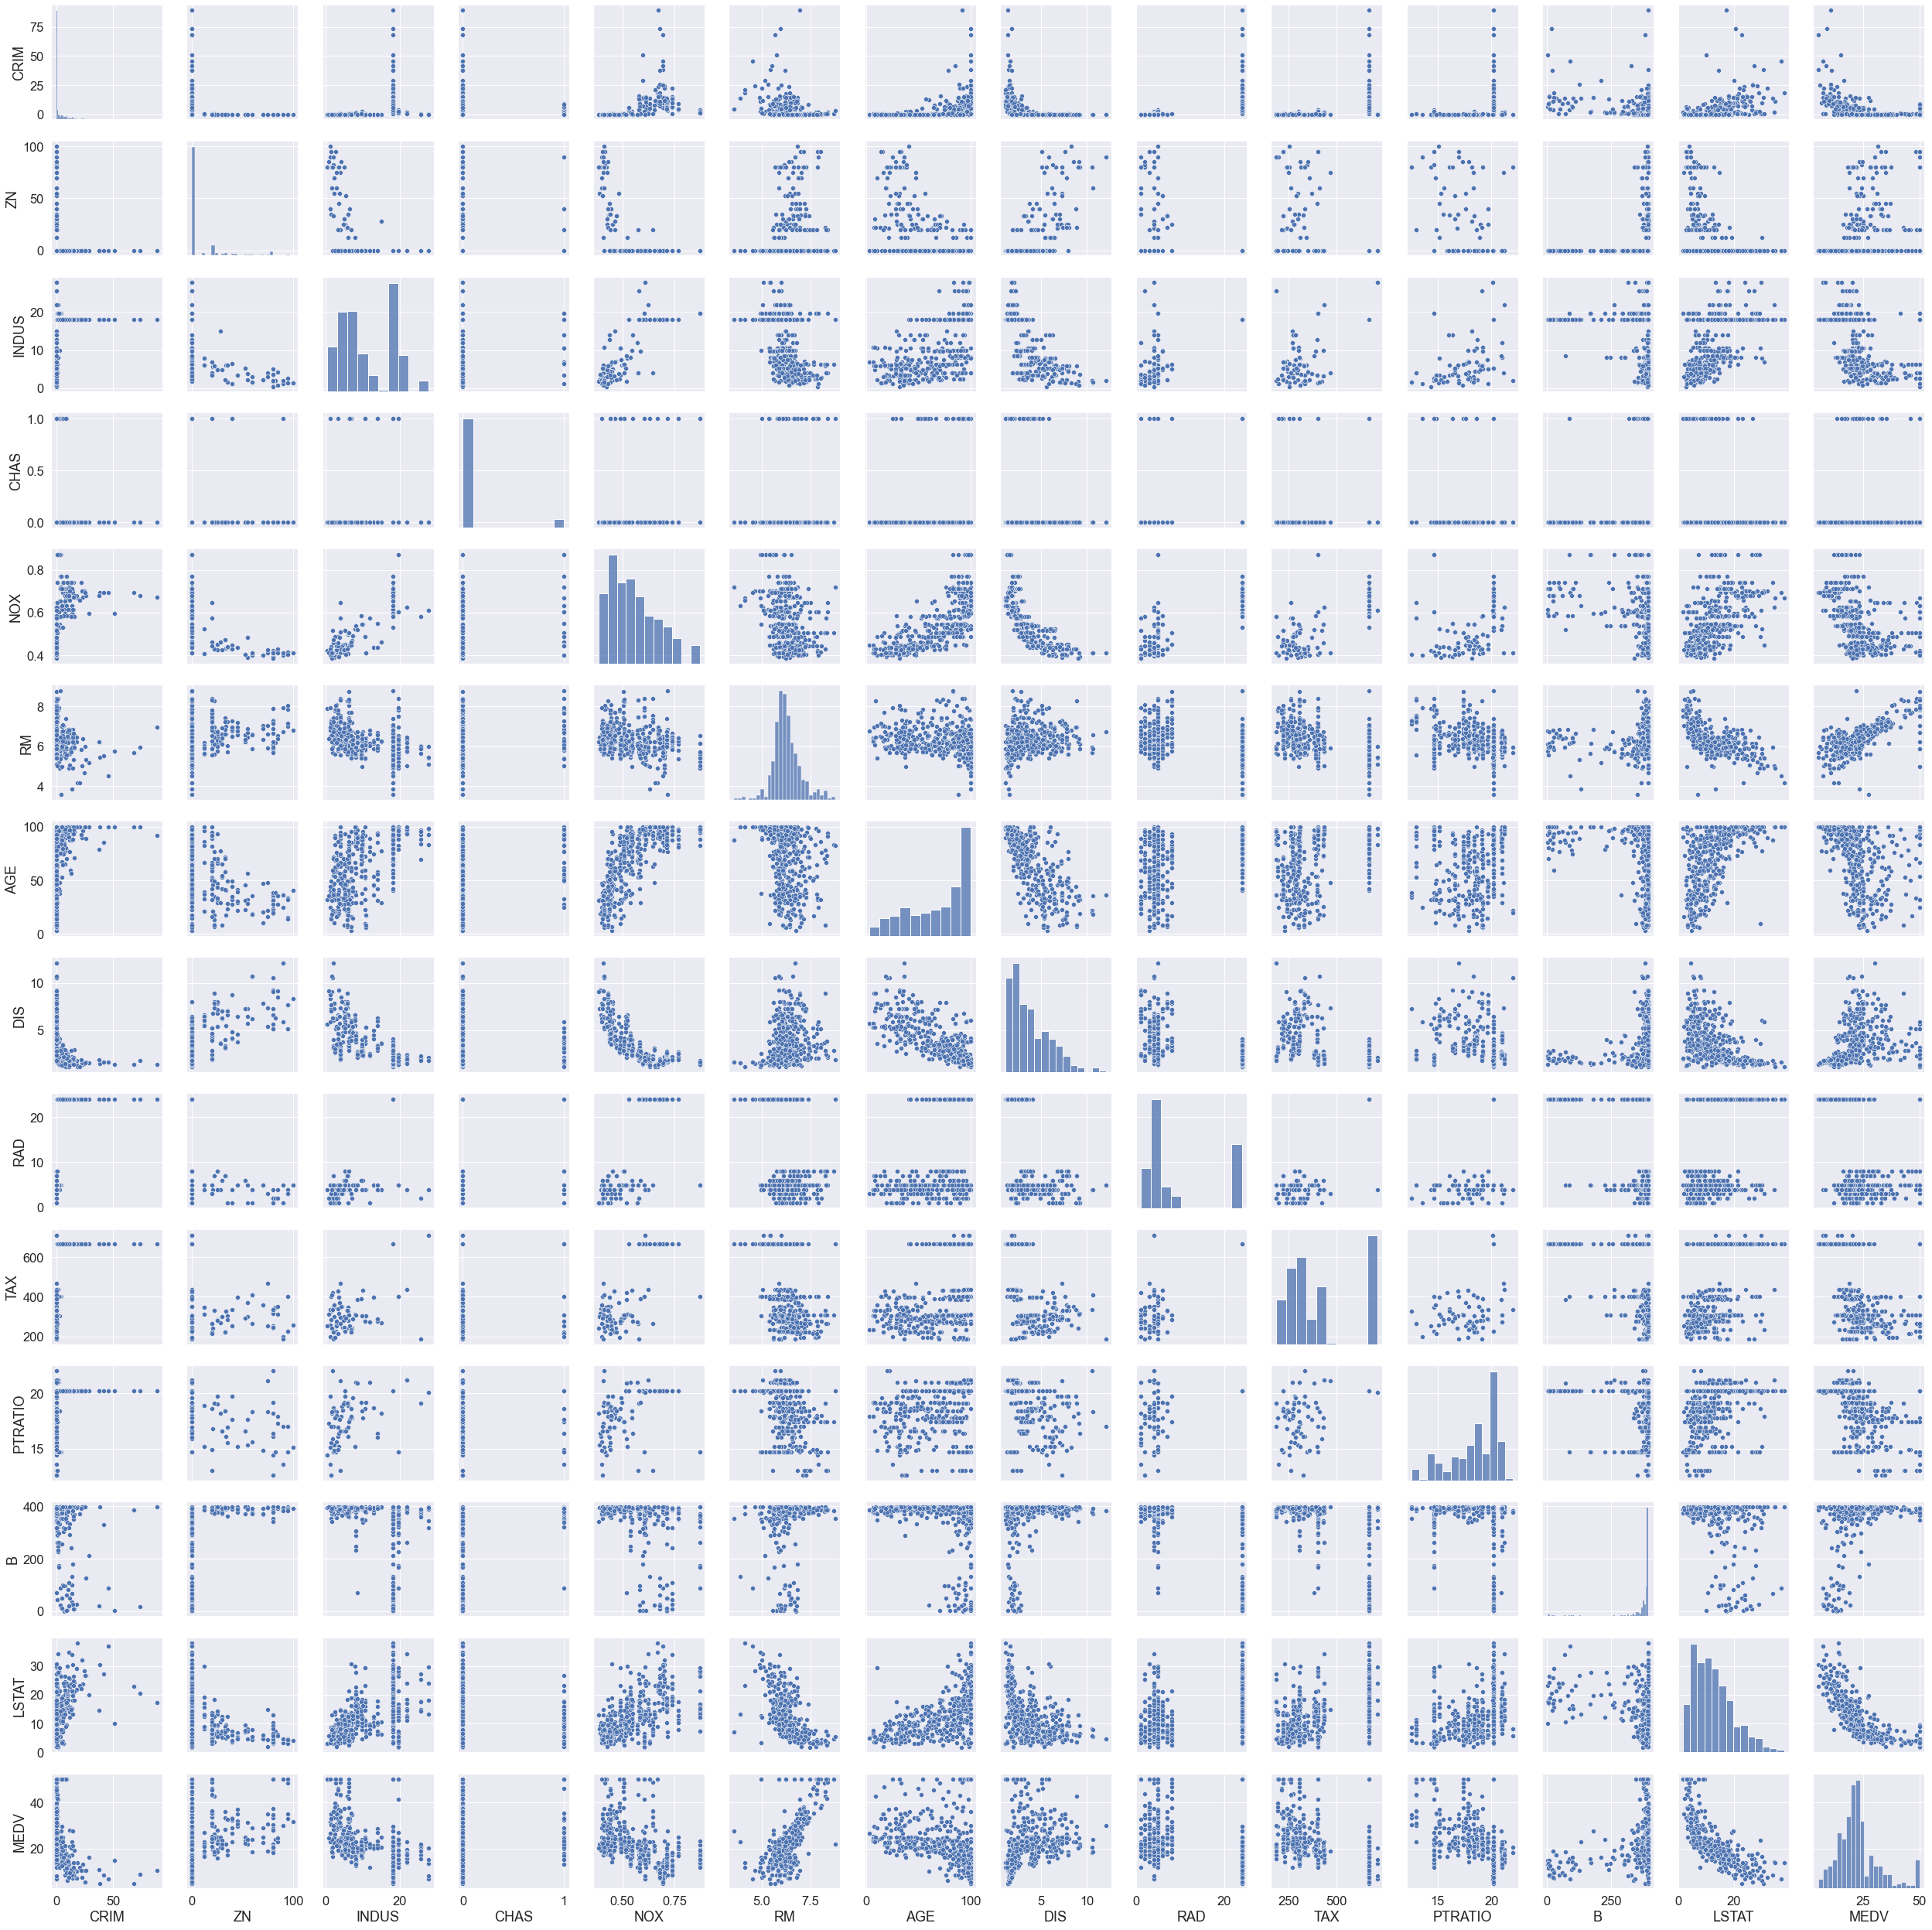

In [7]:
#pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()
plt.show()

## Step3:Data X, Y Setting
According to the previous analysis result, we select three features with highest correlation coefficient. And use the function "train_test_split" to seperate Train and Test data.

In [3]:
#choose x and split train / test
x = data[['RM','LSTAT', 'PTRATIO']]
y = data[['MEDV']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)

## Step4: Construct Model 
In this step, we can train model without any additional adjustion. In the second model, we try to transform all the features to polynominal one. And then reviewing the performance of each model by caculating MSE and function Score.

In [4]:
#train model1
model1 = linear_model.LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
train_pred1 = model1.predict(x_train)

In [5]:
#evaluate the model
MSE = mean_squared_error(y_test, y_pred)
MSE_train1 = mean_squared_error(y_train, train_pred1)
print ("MSE = ", MSE)
print ("MSE_train1 = ", MSE_train1)
score1 = model1.score(x_test, y_test)
print ("Score = ", score1)

MSE =  23.533119171009243
MSE_train1 =  29.35986022730858
Score =  0.7134450288503484


In [15]:
#transform x into polynominal features
polynomial_features= PolynomialFeatures(degree=2) 
x_poly = polynomial_features.fit_transform(x)
xp_train, xp_test, yp_train, yp_test =  train_test_split(x_poly, y, test_size = 0.25, random_state = 99)

#train model2
model2 = linear_model.LinearRegression()
model2.fit(xp_train, yp_train)
yp_pred = model2.predict(xp_test)
train_pred = model2.predict(xp_train)


MSE_Train = mean_squared_error(yp_train, train_pred)
MSE = mean_squared_error(yp_test, yp_pred)

print ("MSE = ", MSE)
print ("MSE_Train = ", MSE_Train)

score2 = model2.score(xp_test, yp_test)
print ("Score = ", score2)

MSE =  12.460178883356777
MSE_Train =  20.214293923229
Score =  0.8558163866689341


In [16]:
#load new data
new_data = pd.read_csv('hw3_prediction.csv')
newx = new_data[['RM','LSTAT', 'PTRATIO']]
newx_poly = polynomial_features.fit_transform(newx)
predict_newy = model2.predict(newx_poly)
#output my answer
my_ans = pd.DataFrame(predict_newy, columns=['new_y'])
my_ans.to_csv('hw3_ans.csv', index=False, header = False)